In [1]:
!pip install pysam
!pip install tqdm
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.2 MB/s eta 0:00:00


In [2]:
from tqdm import tqdm

In [3]:
import pysam

import random

def extract_sequences_from_fasta(fasta_file, tsv_file, output_file, num_lines=10000):
    # Leggi le prime num_lines righe random dal file TSV
    with open(tsv_file, 'r') as tsv:
        # Salta l'intestazione
        next(tsv)
        lines = random.sample(tsv.readlines(), num_lines)

    with open(output_file, 'w') as output:
        # Apri il file FASTA
        with pysam.FastaFile(fasta_file) as fasta:
            for line in tqdm(lines, desc='Elaborazione'):
                parts = line.strip().split('\t')
                chrom = parts[0]
                start = int(parts[1])
                end = int(parts[2])

                # Estrai la sequenza in base alle posizioni
                sequence = fasta.fetch(chrom, start, end)

                # Scrivi la sequenza in un file di output
                output.write(f'>{chrom}:{start}-{end}\n')
                output.write(sequence + '\n')

# Specifica i percorsi dei file
fasta_file = '/content/drive/MyDrive/hg19.fa'
tsv_file = '/content/drive/MyDrive/ESONI.tsv'
output_file = '/content/drive/MyDrive/targettato_GC_10000_new.fa'


In [4]:
def calculate_gc_content(fasta_file_path):
    gc_count = 0
    total_bases = 0

    with open(fasta_file_path, 'r') as fasta_file:
        for line in fasta_file:
            if line.startswith('>'):
                continue  # Salta le righe degli header

            # Calcola il conteggio GC per la sequenza corrente
            gc_count += sum(1 for base in line.strip() if base in 'GCgc')
            total_bases += len(line.strip())

    # Calcola il contenuto GC per l'intera sequenza
    gc_content = (gc_count / total_bases) * 100

    return gc_content

In [5]:
gc_contents=[]

In [6]:
# Esegui l'estrazione delle sequenze
for i in range(10000):
  extract_sequences_from_fasta(fasta_file, tsv_file, output_file)
  gc_content = calculate_gc_content(output_file)
  gc_contents.append(gc_content)

Output streaming troncato alle ultime 5000 righe.
Elaborazione:  37%|███▋      | 3665/10000 [00:01<00:01, 3295.50it/s]


OSError: ignored

In [7]:
len(gc_contents)

6294

In [8]:
for i in range(3706):
  extract_sequences_from_fasta(fasta_file, tsv_file, output_file)
  gc_content = calculate_gc_content(output_file)
  gc_contents.append(gc_content)

Elaborazione: 100%|██████████| 10000/10000 [00:01<00:00, 6141.69it/s]


In [9]:
len(gc_contents)

10000

In [10]:
# Nome del file in cui salvare la lista
nome_file = 'gc_contents_10000_new.txt'

# Apre il file in modalità scrittura
with open(nome_file, 'w') as file:
    for elemento in gc_contents:
        file.write('%s\n' % elemento)

In [11]:
len(gc_contents)

10000

In [12]:
import numpy as np

In [13]:
np.mean(gc_contents)

48.337881399628934

In [14]:
np.var(gc_contents)

0.06501698648134598

<ipython-input-15-f1b5ba594800>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gc_contents, shade=True)


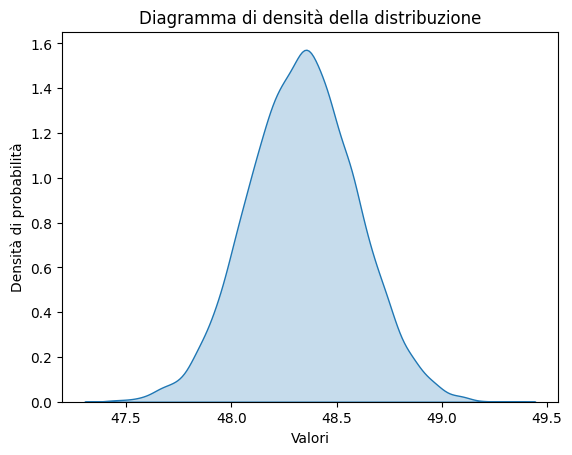

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(gc_contents, shade=True)
plt.xlabel('Valori')
plt.ylabel('Densità di probabilità')
plt.title('Diagramma di densità della distribuzione')
plt.show()